# AAND Numerical 2. Martin Iniguez de Onzono

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp
import scipy.io

## Exercise 1. Trial-Averaged Firing Rates

In [2]:
spikes = np.loadtxt('SpikeTimes.dat').T/1000 # s
t_stim = np.array(5.5) # s
t_res = np.array(0.1e-3) # s

### a) Raster plot.

In [3]:
def plot_spikes(spikes,t_stim):
    plt.eventplot(spikes)
    plt.xlim([0,t_stim]);
    plt.ylim([0,spikes.shape[0]])
    plt.title('Raw spike data')
    plt.xlabel('Time (s)')
    plt.ylabel('Neuron index') 

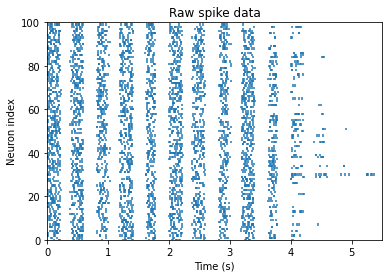

In [4]:
plot_spikes(spikes,t_stim)

### b & c) Trial-averaged firing rates with different number of trials.

In [5]:
widths = np.array([0.03,0.09,0.2])
n_trials = np.array([10,50,100])

In [6]:
def spike_train(spikes,t_stim,t_res):
    spike_train=np.zeros(np.int(t_stim/t_res))
    spikes1 = spikes[~np.isnan(spikes)]
    numbers = np.ndarray.flatten((spikes1/t_res).astype(np.int64))
    spike_train[numbers] = 1   
    
    return spike_train
    
    
def trial_avg_rec(spikes,n_trials,width,t_stim,t_res):

    sequence = np.random.choice(range(100), n_trials, replace=False)
    spike_conv=np.zeros((n_trials,np.int(t_stim/t_res)))
    num = 0 
        
    for i in sequence:
        spike_0= spike_train(spikes[i],t_stim,t_res)
        spike_conv[num,:] = spike_0
        num +=1
        
    spike_conv[:,0] = 0
    trialAvg = spike_conv.mean(axis=0)

    rect_wind = np.ones(np.int(width/t_res))
    rect = np.convolve(trialAvg,rect_wind,mode='same')/width

    return rect,trialAvg

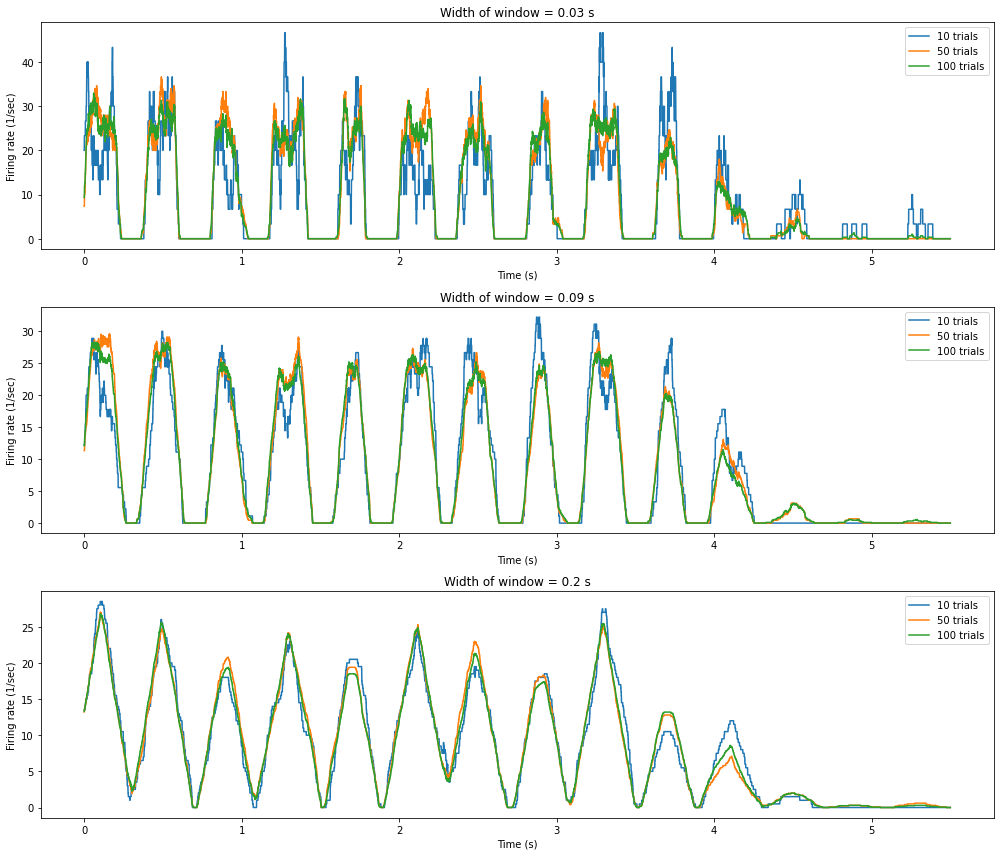

In [7]:
fig = plt.figure(figsize=(14,12))
time = np.arange(0, t_stim, t_res)
   
for i in range(0,len(widths)):
    fig.add_subplot(len(widths),1,i+1)
    
    for j in range(0,len(n_trials)):        
        spikes_rect,_ = trial_avg_rec(spikes,n_trials[j],widths[i],t_stim,t_res)
        plt.plot(time,spikes_rect,label=f'{n_trials[j]} trials')
    
    plt.xlabel('Time (s)')
    plt.ylabel('Firing rate (1/sec)')
    plt.legend()
    plt.title(f'Width of window = {widths[i]} s')
    
plt.tight_layout()

As expected, we can see that the increase in the width of the rectangular window, and of the number of trials, smoothen the Firing rate plots. It can be seen also that the height the firing rate peaks decrease from 50(1/sec) to 30(1/sec). Also an expected result due to the smoothening of the data.

## 2. Spike-Triggered Average.

In [8]:
data = scipy.io.loadmat('STA_data.mat')
spikes = data['SpikeTimes'].T/1000 # s
stimulus = data['Stimulus']
t_stim = np.array(1) # s
t_res = np.array(0.1e-3) # s

In [9]:
data = scipy.io.loadmat('STA_data.mat')
spikes2 = data['SpikeTimes'].T/1000 # s
stimulus2 = data['Stimulus']
t_stim2 = np.array(1) # s
t_res2 = np.array(0.1e-3) # s
tau = 0.05 # s

In [10]:
def sta_corr(spikes,stimulus,t_stim,t_res):
    _,triavg = trial_avg_rec(spikes,100,widths[2],t_stim,t_res)
    stim = stimulus.flatten()
    sta_corr = np.correlate(triavg,stim,'same')
    
    return sta_corr

def plot_sta(sta,tau):
    plt.figure(figsize=(12,5))
    time = np.arange(0,tau,t_res)*1000 # ms
    sta = np.flip(sta)[0:time.shape[0]]
    plt.plot(time,sta)
    plt.xlim(tau*1000,0)
    plt.ylabel('STA (mV)')
    plt.xlabel('Time(ms)')
    plt.title('Spike-Triggered Average')

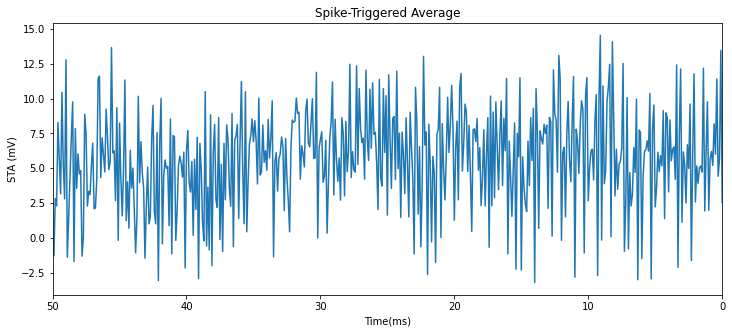

In [11]:
sta = sta_corr(spikes,stimulus,t_stim,t_res)
plot_sta(sta,tau)

The correlation is a much faster operation than a for loop, known for taking a long time: it is one computation instead of one hundred.